<a href="https://colab.research.google.com/github/9008206054/HandwrittenPrediction/blob/main/HandwrittenPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

In [42]:
import numpy as np

In [43]:
import matplotlib.pyplot as plt

In [44]:
from sklearn.datasets import load_digits

In [45]:
df = load_digits()

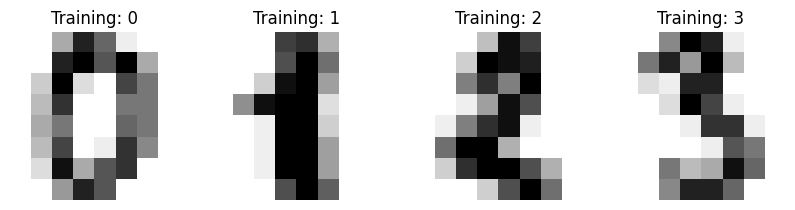

In [46]:
_, axes = plt.subplots(nrows = 1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" %label)

In [47]:
df.images.shape

(1797, 8, 8)

In [48]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [49]:
df.images[0].shape

(8, 8)

In [50]:
len(df.images)

1797

In [52]:
n_samples = len(df.images)
data= df.images.reshape(n_samples, -1)

In [53]:
data[0].shape

(64,)

In [54]:
data.shape

(1797, 64)

In [55]:
data.min()

0.0

In [56]:
data.max()

16.0

In [58]:
data = data/16

In [59]:
data.min()

0.0

In [60]:
data.max()

0.0625

In [61]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3 )

In [64]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()

In [68]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [69]:
y_pred = rf.predict(x_test)

In [70]:
y_pred

array([6, 8, 7, 9, 9, 4, 2, 2, 3, 4, 1, 7, 5, 0, 5, 5, 2, 8, 2, 5, 0, 0,
       5, 9, 4, 8, 7, 8, 4, 8, 5, 1, 7, 7, 5, 1, 3, 0, 6, 2, 0, 6, 2, 1,
       8, 2, 7, 7, 1, 3, 7, 7, 3, 5, 3, 4, 0, 5, 0, 5, 1, 1, 5, 3, 6, 3,
       0, 9, 1, 9, 9, 2, 4, 1, 1, 6, 4, 3, 9, 5, 7, 7, 9, 1, 6, 1, 7, 7,
       1, 8, 0, 1, 2, 0, 0, 3, 1, 7, 5, 7, 4, 8, 5, 8, 0, 2, 7, 5, 9, 9,
       4, 3, 5, 8, 1, 0, 9, 8, 3, 2, 5, 0, 6, 0, 2, 4, 0, 2, 3, 1, 7, 3,
       2, 5, 5, 5, 0, 2, 3, 1, 4, 9, 5, 2, 6, 8, 7, 7, 7, 0, 4, 7, 5, 3,
       5, 7, 4, 0, 9, 6, 6, 1, 3, 7, 6, 3, 8, 1, 3, 8, 8, 6, 5, 8, 8, 4,
       2, 5, 8, 4, 7, 5, 4, 5, 3, 6, 3, 4, 8, 0, 4, 9, 7, 0, 6, 9, 7, 5,
       1, 6, 2, 0, 0, 8, 6, 2, 5, 2, 7, 7, 3, 1, 6, 7, 5, 6, 8, 2, 8, 0,
       1, 2, 6, 8, 1, 6, 3, 4, 0, 1, 5, 4, 7, 2, 8, 0, 6, 1, 8, 4, 4, 0,
       2, 7, 0, 8, 7, 4, 3, 6, 5, 9, 5, 5, 4, 1, 4, 2, 8, 9, 7, 3, 9, 2,
       1, 1, 1, 4, 7, 6, 1, 0, 0, 8, 9, 0, 2, 1, 7, 5, 9, 3, 5, 3, 0, 1,
       7, 6, 1, 4, 8, 7, 5, 1, 3, 2, 5, 8, 5, 0, 7,

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
confusion_matrix(y_test, y_pred)

array([[61,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  1,  0,  3,  1,  1,  0,  0,  1, 46]])

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.98        60
           2       1.00      0.98      0.99        57
           3       0.94      0.96      0.95        50
           4       0.96      0.98      0.97        52
           5       0.98      0.98      0.98        53
           6       1.00      1.00      1.00        48
           7       0.97      1.00      0.98        59
           8       0.94      0.98      0.96        46
           9       0.98      0.87      0.92        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

